<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/3%EC%A3%BC%EC%B0%A8_%EC%84%B8%EC%85%98_0322_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [ ]:
top5 = chipo['item_name'].value_counts().sort_values(ascending=False)[:5]
print(top5)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64


<Axes: >

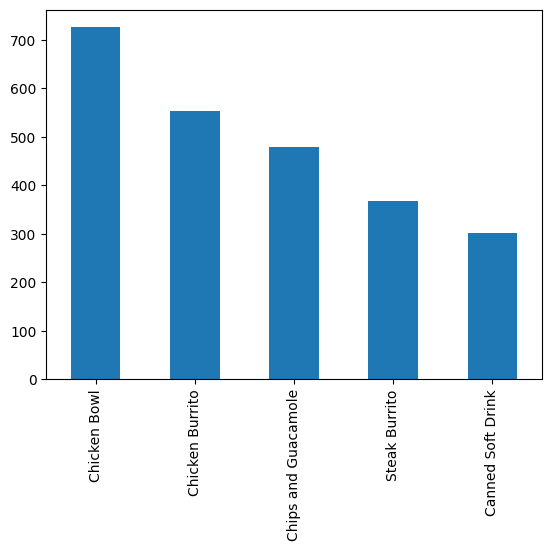

In [ ]:
top5.plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [ ]:
orders = chipo.groupby('order_id').sum()
print(orders)

          quantity
order_id          
1                4
2                2
3                2
4                2
5                2
...            ...
1830             2
1831             3
1832             2
1833             2
1834             3

[1834 rows x 1 columns]


<ipython-input-59-d13b3eda3cc6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = chipo.groupby('order_id').sum()


<ipython-input-60-f6358afb2996>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = chipo.groupby('order_id').sum()


Text(0.5, 1.0, 'Number of items ordered per order price')

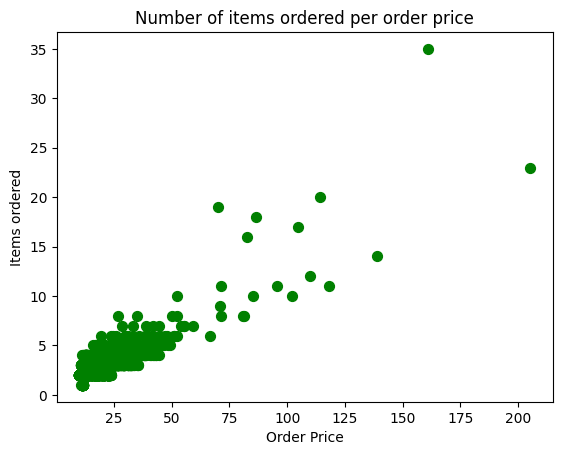

In [ ]:
# 달러 표시 없앤 item_price를 chipo에 저장
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # 달러 표시 없애기 위해서 index 1부터 마지막 자리까지 인덱싱

# order_id로 groupby하여 sum 구하기
orders = chipo.groupby('order_id').sum()

# scatterplot 그리기
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')


### Step 7. BONUS: Create a question and a graph to answer your own question.